# Exercise 04 : Histogram

The length of the list of the values for working days is: 2037
The length of the list of the values for weekends is: 1170

TOP-4 examples of hours when the total number of commits was higher on weekends than on working days:  [13, 11, 23, 22]


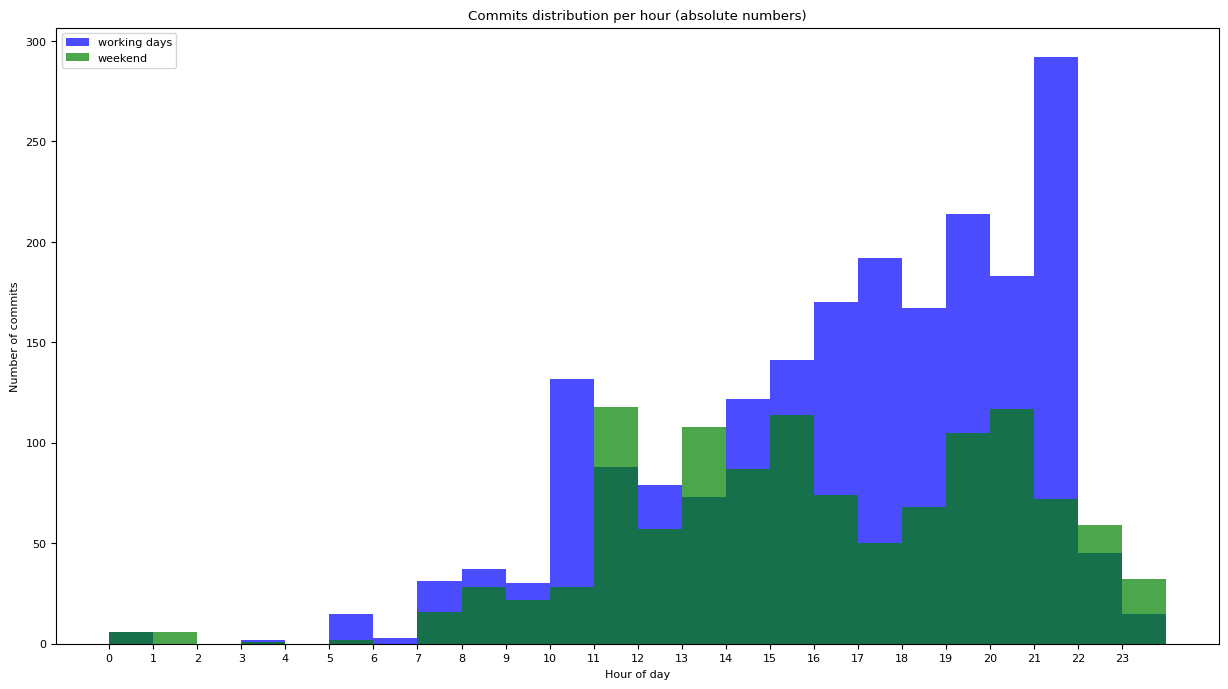

In [3]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

plt.rcParams.update({"font.size": 8})

con = sqlite3.connect(r"../data/checking-logs.sqlite")

checker = pd.read_sql("""
SELECT uid, timestamp, 1 as commits 
FROM checker 
WHERE uid LIKE 'user_%'
""", con, parse_dates=['timestamp'])

checker['hour'] = checker['timestamp'].dt.hour
checker['weekday'] = checker['timestamp'].dt.dayofweek
checker['day_type'] = checker['weekday'].apply(lambda x: 'weekend' if x >= 5 else 'working_day')

wd_hours = checker[checker['day_type'] == 'working_day']['hour'].values
we_hours = checker[checker['day_type'] == 'weekend']['hour'].values

plt.figure(figsize=(15, 8))
plt.hist(wd_hours, bins=24, alpha=0.7, color='blue', label='working days', range=(0, 24))
plt.hist(we_hours, bins=24, alpha=0.7, color='green', label='weekend', range=(0, 24))
plt.legend(loc='upper left')
plt.title('Commits distribution per hour (absolute numbers)')
plt.xlabel('Hour of day')
plt.ylabel('Number of commits')
plt.xticks(range(0, 24))
# plt.grid(True)

# Questions
print(f"The length of the list of the values for working days is: {len(wd_hours)}")
print(f"The length of the list of the values for weekends is: {len(we_hours)}")

total_per_hour = checker.groupby(['day_type', 'hour'])['commits'].sum().unstack('day_type').fillna(0)
diff = total_per_hour['weekend'] - total_per_hour['working_day']
hours_more_weekends = diff[diff > 0].sort_values(ascending=False).index.tolist()[:4]
print("\nTOP-4 examples of hours when the total number of commits was higher on weekends than on working days: ", hours_more_weekends)

con.close()

**Are there hours when the total number of commits was higher on weekends than on working days?**  
Top examples: **[13, 11, 23, 22]**